## TEXT RANK on Clusters 

To get top ranked relevant sentences in the cluster for in-depth cluster analysis.

In [1]:
from sentence_transformers import SentenceTransformer
bmodel = SentenceTransformer('all-MiniLM-L6-v2')

In [2]:
import pandas as pd

df = pd.read_csv('data/cluster.csv')

In [3]:
import numpy as np
from tqdm import tqdm
import networkx
import matplotlib.pyplot as plt
%matplotlib inline

def getData(cluster):
    all_words = ''.join([word for word in df[df['Label'] == cluster]['Speech']]).replace('\n', '.')
    df_analysis = pd.DataFrame(all_words.split('.'), columns=['Speech'])
    df_analysis = df_analysis.loc[df_analysis['Speech'].str.split(' ').apply(len) > 8]
    df_analysis.reset_index(inplace=True,drop=True)
    return all_words, df_analysis

def textRank(df_analysis):

    bert_embeddings = bmodel.encode(df_analysis['Speech'])
    a = bert_embeddings[0]
    b = bert_embeddings[1]
    cos_sim = (a @ b.T) / (np.linalg.norm(a)*np.linalg.norm(b))
    
    M = np.eye(bert_embeddings.shape[0])

    for i,a in tqdm(enumerate(bert_embeddings)):
        for j,b in enumerate(bert_embeddings):
            if i != j:
                M[i,j] = (a @ b.T) / (np.linalg.norm(a)*np.linalg.norm(b))
                
    similarity_graph = networkx.from_numpy_array(M)
    return similarity_graph


1754it [02:11, 13.38it/s]


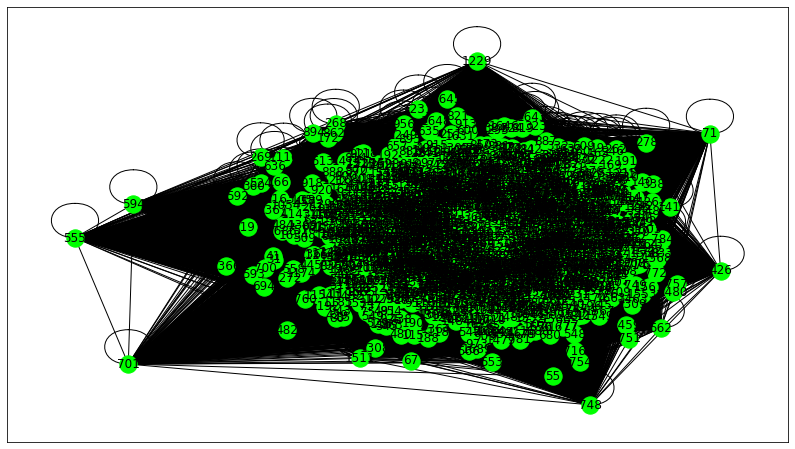

In [4]:
### Text Rank on Cluster 0

allword0, df0 = getData(0)

similarity_graph = textRank(df0)

import matplotlib.pyplot as plt
%matplotlib inline
from scipy import sparse

plt.figure(figsize=(14, 8))
networkx.draw_networkx(similarity_graph, node_color='lime')

In [5]:
scores=networkx.pagerank(similarity_graph)
nx_ranked_sentences = sorted(((score, index) for index, score 
                                            in scores.items()),reverse=True)

In [6]:
print('Top ranked/relevant sentences in Cluster 0 are ')
for i in range(0, len(nx_ranked_sentences[:10])):
    print('Sentence ', i)
    print(df0.iloc[nx_ranked_sentences[i][1]]['Speech'])

Top ranked/relevant sentences in Cluster 0 are 
Sentence  0
 the political powers trying stop people who stripped jobs form inner cities, trapped millions african-americans hispanic-americans impoverished, crime-besieged neighborhoods, left million american women child poverty near brink poverty center assault american prosperity clinton machine
Sentence  1
 ending theft american jobs give resources need rebuild military regain financial independence strength person running presidency understands problem knows fix
Sentence  2
 her policies created disaster overseas, poverty home running reverse failures, create new american future
Sentence  3
 after losing thousands lives spending trillions dollars, far worse shape middle east ever before challenge anyone explain strategic foreign policy vision obama-clinton  complete total disaster also prepared deploy america economic resources
Sentence  4
 working unison, deliver real american change country desperately needs make america strong ag